<a href="https://colab.research.google.com/github/ManishTyagicse/DSA/blob/main/Copy_of_Crop_Recomendation_and_Blockchain_integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
"""import kagglehub
atharvaingle_crop_recommendation_dataset_path = kagglehub.dataset_download('atharvaingle/crop-recommendation-dataset')
shreyanshmanavshukla_solidity_path = kagglehub.dataset_download('shreyanshmanavshukla/solidity')

print('Data source import complete.')"""


"import kagglehub\natharvaingle_crop_recommendation_dataset_path = kagglehub.dataset_download('atharvaingle/crop-recommendation-dataset')\nshreyanshmanavshukla_solidity_path = kagglehub.dataset_download('shreyanshmanavshukla/solidity')\n\nprint('Data source import complete.')"

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Replace this path with the actual path to your CSV in Google Drive
file_path = '/content/drive/MyDrive/Crop_recommendation.csv'

# Load the CSV
meta = pd.read_csv(file_path)

# Preview data
meta.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
!nvidia-smi';

/bin/bash: -c: line 1: unexpected EOF while looking for matching `''
/bin/bash: -c: line 2: syntax error: unexpected end of file


# Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Data Loading



In [6]:
'''import os
"""
N - ratio of Nitrogen content in soil
P - ratio of Phosphorous content in soil
K - ratio of Potassium content in soil
temperature - temperature in degree Celsius
humidity - relative humidity in %
ph - ph value of the soil
rainfall - rainfall in mm
"""
def get_data():
    return pd.read_csv('/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv')
meta=get_data()'''


'import os\n"""\nN - ratio of Nitrogen content in soil\nP - ratio of Phosphorous content in soil\nK - ratio of Potassium content in soil\ntemperature - temperature in degree Celsius\nhumidity - relative humidity in %\nph - ph value of the soil\nrainfall - rainfall in mm\n"""\ndef get_data():\n    return pd.read_csv(\'/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv\')\nmeta=get_data()'

In [7]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


# Data Preprocessing

In [8]:
Labels = meta['label'].unique()
print("No. of labels:",len(Labels))
Labels = {label: i for i, label in enumerate(Labels)}
Labels_Decoder = {i: label for i, label in enumerate(Labels)}
Labels



No. of labels: 22


{'rice': 0,
 'maize': 1,
 'chickpea': 2,
 'kidneybeans': 3,
 'pigeonpeas': 4,
 'mothbeans': 5,
 'mungbean': 6,
 'blackgram': 7,
 'lentil': 8,
 'pomegranate': 9,
 'banana': 10,
 'mango': 11,
 'grapes': 12,
 'watermelon': 13,
 'muskmelon': 14,
 'apple': 15,
 'orange': 16,
 'papaya': 17,
 'coconut': 18,
 'cotton': 19,
 'jute': 20,
 'coffee': 21}

In [9]:
Labels_Decoder[0]

'rice'

In [10]:
# (warning)run only once..
meta['label'] = meta['label'].map(Labels)
meta['label'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [11]:
meta.head(1000)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0
...,...,...,...,...,...,...,...,...
995,33,23,45,20.002190,85.836182,7.116539,112.337046,9
996,4,14,41,19.851393,89.807323,6.430163,102.818636,9
997,13,17,45,21.254336,92.650589,7.159521,106.278467,9
998,39,24,39,23.653741,93.326575,6.431266,109.807618,9


## Visualiztion

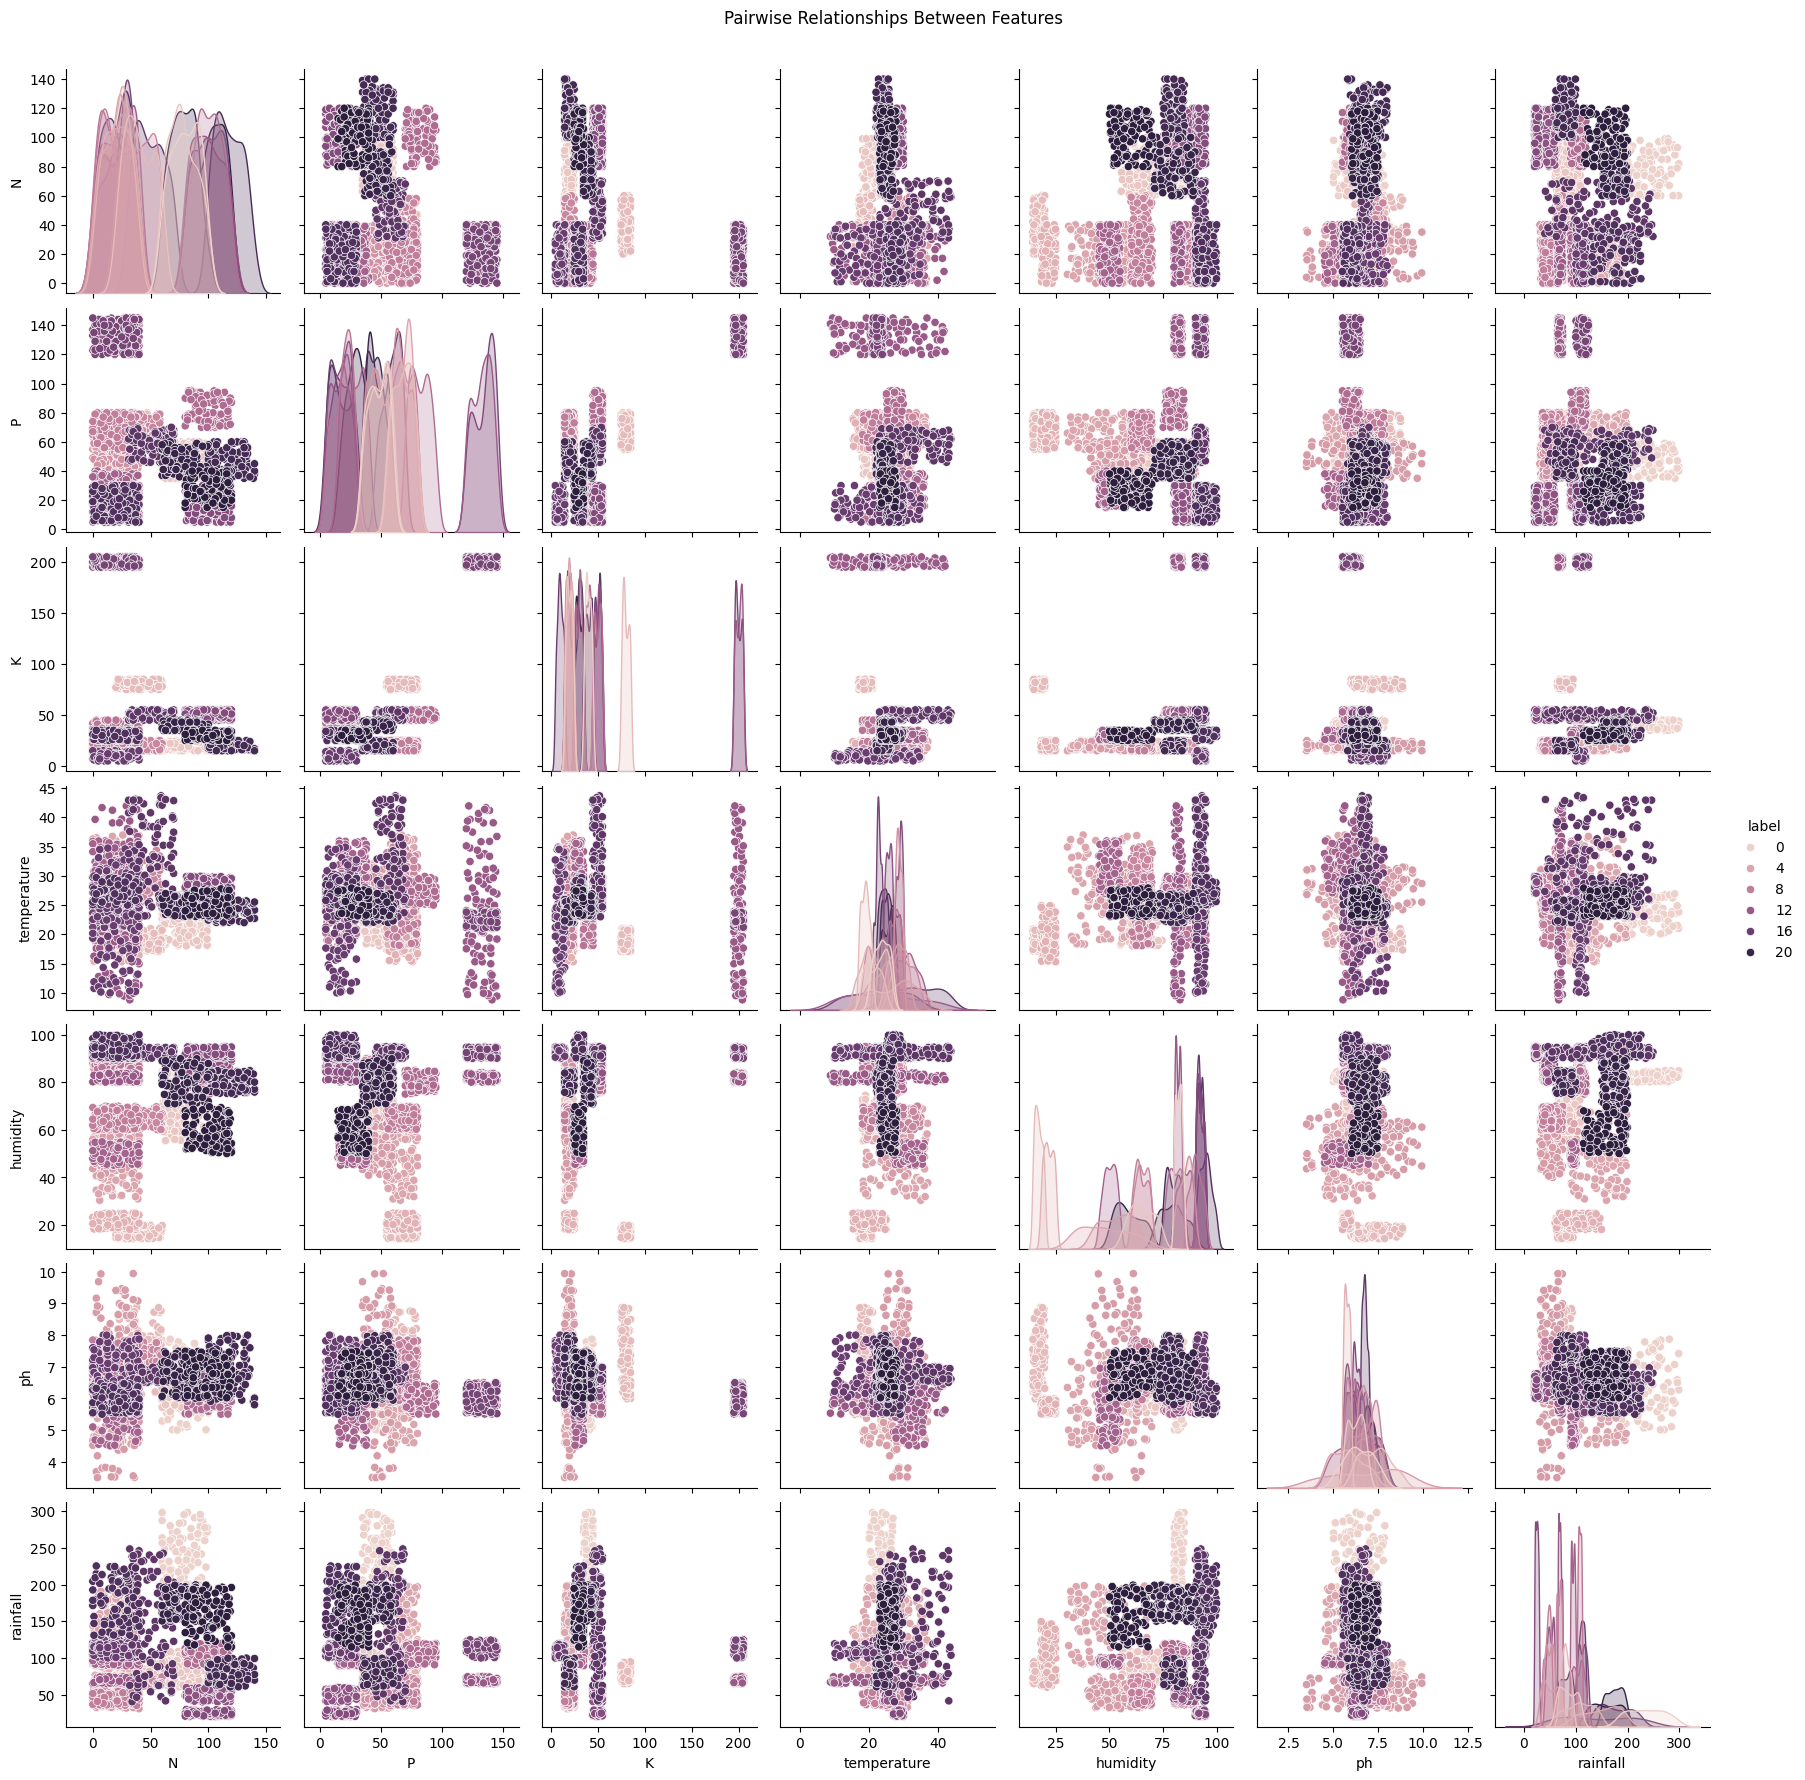

In [12]:
sns.pairplot(meta, hue='label', vars=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
plt.suptitle('Pairwise Relationships Between Features', y=1.02)
plt.show()


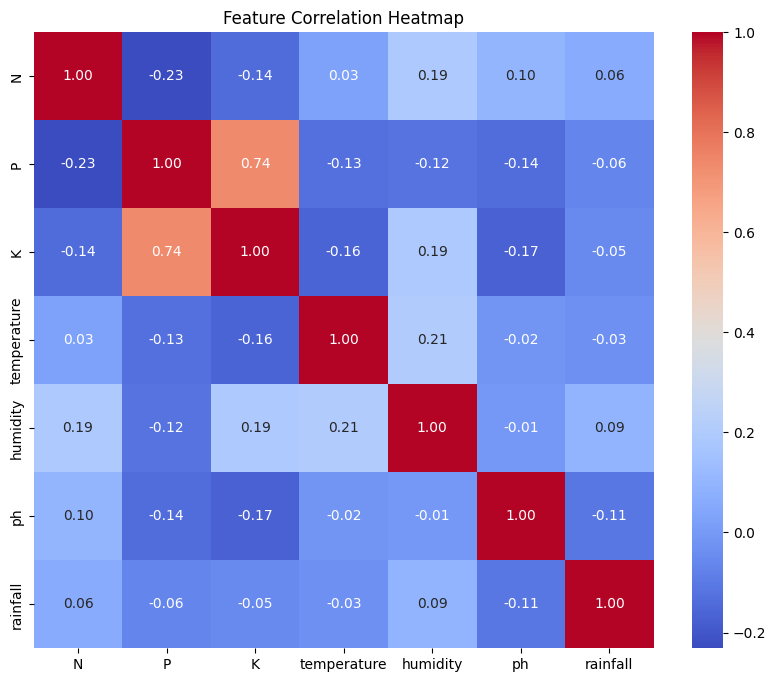

In [13]:
plt.figure(figsize=(10, 8))
correlation_matrix = meta[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
# plt.savefig("Features_Correlation.png",dpi=600)
plt.show()


# Feature Selection

In [14]:
# Assuming 'meta' is your DataFrame and 'X' contains the features and 'y' contains the labels
X = meta.drop(columns=['label'])  # Features
y = meta['label']

In [15]:
y

,label
0,0
1,0
2,0
3,0
4,0
...,...
2195,21
2196,21
2197,21
2198,21


## Data Splitting

In [16]:

# Split the data into training and test sets (e.g., 80% training and 20% testing)
Train_set, Val_set = train_test_split(meta, test_size=0.3, random_state=42)
Test_set, Val_set = train_test_split(Val_set, test_size=0.5, random_state=42)


In [17]:
len(Test_set)

330

In [18]:
Train_set

,N,P,K,temperature,humidity,ph,rainfall,label
1102,21,26,27,27.003155,47.675254,5.699587,95.851183,11
1159,29,35,28,28.347161,53.539031,6.967418,90.402604,11
141,60,44,23,24.794708,70.045567,5.722580,76.728601,1
1004,80,77,49,26.054330,79.396545,5.519088,113.229737,10
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0
...,...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436,16
1095,108,94,47,27.359116,84.546250,6.387431,90.812505,10
1130,11,36,31,27.920633,51.779659,6.475449,100.258567,11
1294,11,124,204,13.429886,80.066340,6.361141,71.400430,12


In [19]:
X_train, y_train = Train_set.drop(columns=['label']), Train_set['label']
X_val, y_val = Val_set.drop(columns=['label']), Val_set['label']
X_test, y_test = Test_set.drop(columns=['label']), Test_set['label']

## Scaling(Optional)

In [20]:
scaler = StandardScaler()

numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
# Fit and transform the training data
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

# Transform the validation and test data using the same scaler (don't refit!)
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [21]:
y_test

,label
1769,17
1322,13
679,6
1511,15
485,4
...,...
1845,18
1391,13
998,9
59,0


In [22]:
X_train['rainfall'].max()

3.5380994758968334

# Training

# ML Models

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
# Create a Logistic Regression model with softmax (multi-class)
LR_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100)

In [25]:
# Fit the model on the training data
LR_model = LR_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [26]:
import joblib
# Save the model
joblib.dump(LR_model, "logistic_regression_model.pkl")
print("Model saved as logistic_regression_model.pkl")

Model saved as logistic_regression_model.pkl


In [27]:
# For model evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score,
    cohen_kappa_score,
    log_loss
)
def evaluate_model(model, X, y, dataset_type="train"):
    """
    Evaluates the performance of a logistic regression model on a given dataset.

    Parameters:
        model (object): Trained logistic regression model.
        X (array): Features of the dataset.
        y (array): True labels of the dataset.
        dataset_type (str): Type of dataset being evaluated ("train" or "val").

    Returns:
        dict: Dictionary containing evaluation metrics.
    """

    from sklearn.preprocessing import label_binarize

    # Predict probabilities and class labels
    y_pred_prob = model.predict_proba(X)
    y_pred = model.predict(X)

    # Binarize labels for multiclass PRC computation
    classes = model.classes_
    y_binarized = label_binarize(y, classes=classes)

    # Calculate metrics for multiclass
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_binarized, y_pred_prob, multi_class='ovr', average='weighted')  # Multiclass AUC

    # PRC AUC for each class
    prc_aucs = []
    for i in range(len(classes)):
        prc_aucs.append(average_precision_score(y_binarized[:, i], y_pred_prob[:, i]))
    prc_auc = sum(prc_aucs) / len(prc_aucs)  # Average across classes

    kappa = cohen_kappa_score(y, y_pred)
    loss = log_loss(y, y_pred_prob)

    # Prepare results
    results = {
        "Dataset Type": dataset_type,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "PRC AUC": prc_auc,
        "Kappa Coefficient": kappa,
        "Log Loss": loss,
    }

    return results


In [28]:
evaluate_model(LR_model, X_val,y_val,"Val" )

{'Dataset Type': 'Val',
 'Accuracy': 0.9515151515151515,
 'Precision': 0.9527939907425553,
 'Recall': 0.9515151515151515,
 'F1 Score': 0.9512255241296914,
 'ROC AUC': np.float64(0.9990939280222941),
 'PRC AUC': np.float64(0.9835211305681145),
 'Kappa Coefficient': np.float64(0.9490440942298227),
 'Log Loss': 0.24651406503476916}

## Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [30]:
# Create the base Decision Tree model
model = DecisionTreeClassifier()


In [31]:
# Train the model
DT_model = model.fit(X_train, y_train)

In [32]:
evaluate_model(DT_model, X_val, y_val, dataset_type="val")

{'Dataset Type': 'val',
 'Accuracy': 0.9848484848484849,
 'Precision': 0.9856199986881806,
 'Recall': 0.9848484848484849,
 'F1 Score': 0.9847840199618857,
 'ROC AUC': np.float64(0.9921180836589287),
 'PRC AUC': np.float64(0.96893030098244),
 'Kappa Coefficient': np.float64(0.9840781233414712),
 'Log Loss': 0.5461159604411692}

In [33]:
import joblib
# Save the model
joblib.dump(DT_model, "DT_model.pkl")
print("Model saved as DT_model.pkl")

Model saved as DT_model.pkl


## SVM

In [34]:
from sklearn.svm import SVC
# Create the SVC model
model = SVC(probability=True)



In [35]:
# Train the model
SVM_model = model.fit(X_train, y_train)

In [36]:
evaluate_model(SVM_model, X_val, y_val, dataset_type="val")

{'Dataset Type': 'val',
 'Accuracy': 0.9757575757575757,
 'Precision': 0.9793469815208945,
 'Recall': 0.9757575757575757,
 'F1 Score': 0.9753080281538892,
 'ROC AUC': np.float64(0.9996726918414485),
 'PRC AUC': np.float64(0.9935184439206437),
 'Kappa Coefficient': np.float64(0.9745193421357424),
 'Log Loss': 0.19263405220767374}

In [37]:
import joblib
# Save the model
joblib.dump(SVM_model, "SVM_model.pkl")
print("Model saved as SVM_model.pkl")

Model saved as SVM_model.pkl


In [38]:
from sklearn.metrics import accuracy_score
# Training accuracy
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Validation accuracy
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Training Accuracy: 0.9883
Validation Accuracy: 0.9758


## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [41]:
# Train the model
RF_model =model.fit(X_train, y_train)

In [42]:
evaluate_model(RF_model, X_val, y_val, dataset_type="val")

{'Dataset Type': 'val',
 'Accuracy': 0.9939393939393939,
 'Precision': 0.9945773524720893,
 'Recall': 0.9939393939393939,
 'F1 Score': 0.9938552188552187,
 'ROC AUC': np.float64(0.9998843109031477),
 'PRC AUC': np.float64(0.9978422657898164),
 'Kappa Coefficient': np.float64(0.9936300814577462),
 'Log Loss': 0.06431017661652777}

In [43]:
from sklearn.metrics import accuracy_score
# Training accuracy
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Validation accuracy
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Training Accuracy: 1.0000
Validation Accuracy: 0.9939


In [44]:
import joblib
# Save the model
joblib.dump(RF_model, "random_forest_model.pkl")
print("Model saved as random_forest_model.pkl")

Model saved as random_forest_model.pkl


In [45]:
import joblib
# Load the model
loaded_model = joblib.load("random_forest_model.pkl")
print("Model loaded successfully")

# Make predictions
predictions = loaded_model.predict(X_test)
predictions[0]


Model loaded successfully


np.int64(17)

## KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
# Create the KNN model
model = KNeighborsClassifier(n_neighbors=5)  # You can change n_neighbors to any other number

# Train the model
KNN_model = model.fit(X_train, y_train)

In [48]:
evaluate_model(KNN_model, X_val, y_val, dataset_type="val")

{'Dataset Type': 'val',
 'Accuracy': 0.9636363636363636,
 'Precision': 0.9670316201146241,
 'Recall': 0.9636363636363636,
 'F1 Score': 0.963543027627828,
 'ROC AUC': np.float64(0.9980355718557646),
 'PRC AUC': np.float64(0.9855166218918652),
 'Kappa Coefficient': np.float64(0.9617771686148084),
 'Log Loss': 0.18845350853283818}

In [49]:
import joblib
# Save the model
joblib.dump(KNN_model, "KNN_model.pkl")
print("Model saved as KNN_model.pkl")

Model saved as KNN_model.pkl


In [50]:
from sklearn.metrics import accuracy_score
# Training accuracy
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Validation accuracy
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Training Accuracy: 0.9890
Validation Accuracy: 0.9636


## XGBoost

In [51]:
!pip install xgboost


In [52]:
import xgboost as xgb
# Create the XGBoost model
model = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss')

# Train the model
XG_model = model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:25:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [53]:
evaluate_model(XG_model, X_val, y_val, dataset_type="val")

{'Dataset Type': 'val',
 'Accuracy': 0.9818181818181818,
 'Precision': 0.9839352168299536,
 'Recall': 0.9818181818181818,
 'F1 Score': 0.981642723150012,
 'ROC AUC': np.float64(0.9999132948428341),
 'PRC AUC': np.float64(0.9983469097223423),
 'Kappa Coefficient': np.float64(0.980894485453756),
 'Log Loss': 0.06893675858720322}

In [54]:
from sklearn.metrics import accuracy_score
# Training accuracy
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Validation accuracy
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Training Accuracy: 1.0000
Validation Accuracy: 0.9818


In [55]:
import joblib
# Save the model
joblib.dump(XG_model, "XG_model.pkl")
print("Model saved as XG_model.pkl")

Model saved as XG_model.pkl


# DL Model

## MLP

In [56]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [57]:
from tensorflow.keras.utils import to_categorical

# One-hot encode labels using Keras
y_train_encoded = to_categorical(y_train, num_classes=22)
y_val_encoded = to_categorical(y_val, num_classes=22)
y_test_encoded = to_categorical(y_test, num_classes=22)


In [58]:
# Build the MLP model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # Input and first hidden layer
model.add(Dense(64, activation='relu'))  # Second hidden layer
model.add(Dense(22, activation='softmax'))  # Output layer for 22 classes


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 22)             │         1,430 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,798 (14.84 KB)

 Trainable params: 3,798 (14.84 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
ANN_model = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_val, y_val_encoded))


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.1436 - loss: 2.9618 - val_accuracy: 0.4727 - val_loss: 2.4436
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5410 - loss: 2.2693 - val_accuracy: 0.6333 - val_loss: 1.7092
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6745 - loss: 1.5690 - val_accuracy: 0.7606 - val_loss: 1.0822
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7764 - loss: 0.9886 - val_accuracy: 0.8424 - val_loss: 0.7283
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8972 - loss: 0.6570 - val_accuracy: 0.8848 - val_loss: 0.5400
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9116 - loss: 0.4867 - val_accuracy: 0.8970 - val_loss: 0.4320
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9365 - loss: 0.3655 - val_accuracy: 0.8970 - val_loss: 0.3667
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9441 - loss: 0.2981 - val_accuracy: 0.9212 - val_

In [61]:
y_test.iloc[1]

np.int64(13)

In [62]:
import joblib
# Save the model
joblib.dump(model, "ANN_model.pkl")
print("Model saved as ANN_model.pkl")

Model saved as ANN_model.pkl


In [63]:
y_test_pred = model.predict(X_test)[1]
max_index = np.argmax(y_test_pred)
max_index

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


np.int64(13)

In [64]:
def evaluate_model(model, X, y, dataset_type="train"):
    """
    Evaluates the performance of a Keras Sequential model on a given dataset.

    Parameters:
        model (object): Trained Keras Sequential model.
        X (array): Features of the dataset.
        y (array): True labels of the dataset.
        dataset_type (str): Type of dataset being evaluated ("train" or "val").

    Returns:
        dict: Dictionary containing evaluation metrics.
    """
    from sklearn.metrics import (
        accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
        average_precision_score, log_loss, cohen_kappa_score
    )
    from sklearn.preprocessing import label_binarize
    import numpy as np

    # Predict probabilities and class labels
    y_pred_prob = model.predict(X)  # Keras model's predict method
    y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

    # Binarize labels for multiclass PRC computation
    classes = np.unique(y)
    y_binarized = label_binarize(y, classes=classes)

    # Calculate metrics for multiclass
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_binarized, y_pred_prob, multi_class='ovr', average='weighted')

    # PRC AUC for each class
    prc_aucs = []
    for i in range(len(classes)):
        prc_aucs.append(average_precision_score(y_binarized[:, i], y_pred_prob[:, i]))
    prc_auc = sum(prc_aucs) / len(prc_aucs)

    kappa = cohen_kappa_score(y, y_pred)
    loss = log_loss(y, y_pred_prob)

    # Prepare results
    results = {
        "Dataset Type": dataset_type,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "PRC AUC": prc_auc,
        "Kappa Coefficient": kappa,
        "Log Loss": loss,
    }

    return results


In [65]:
evaluate_model(model, X_val, y_val, dataset_type="val")

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


{'Dataset Type': 'val',
 'Accuracy': 0.9393939393939394,
 'Precision': 0.9435683398726877,
 'Recall': 0.9393939393939394,
 'F1 Score': 0.9383804679815362,
 'ROC AUC': np.float64(0.998438966046554),
 'PRC AUC': np.float64(0.9709380144086186),
 'Kappa Coefficient': np.float64(0.9363081911526288),
 'Log Loss': 0.2454370092221134}

In [66]:
from sklearn.metrics import accuracy_score
# Training accuracy
y_train_pred = model.predict(X_train)
y_train_pred = np.argmax(y_train_pred,axis=1)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Validation accuracy
y_val_pred = model.predict(X_val)
y_val_pred = np.argmax(y_val_pred,axis=1)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Training Accuracy: 0.9610
Validation Accuracy: 0.9394


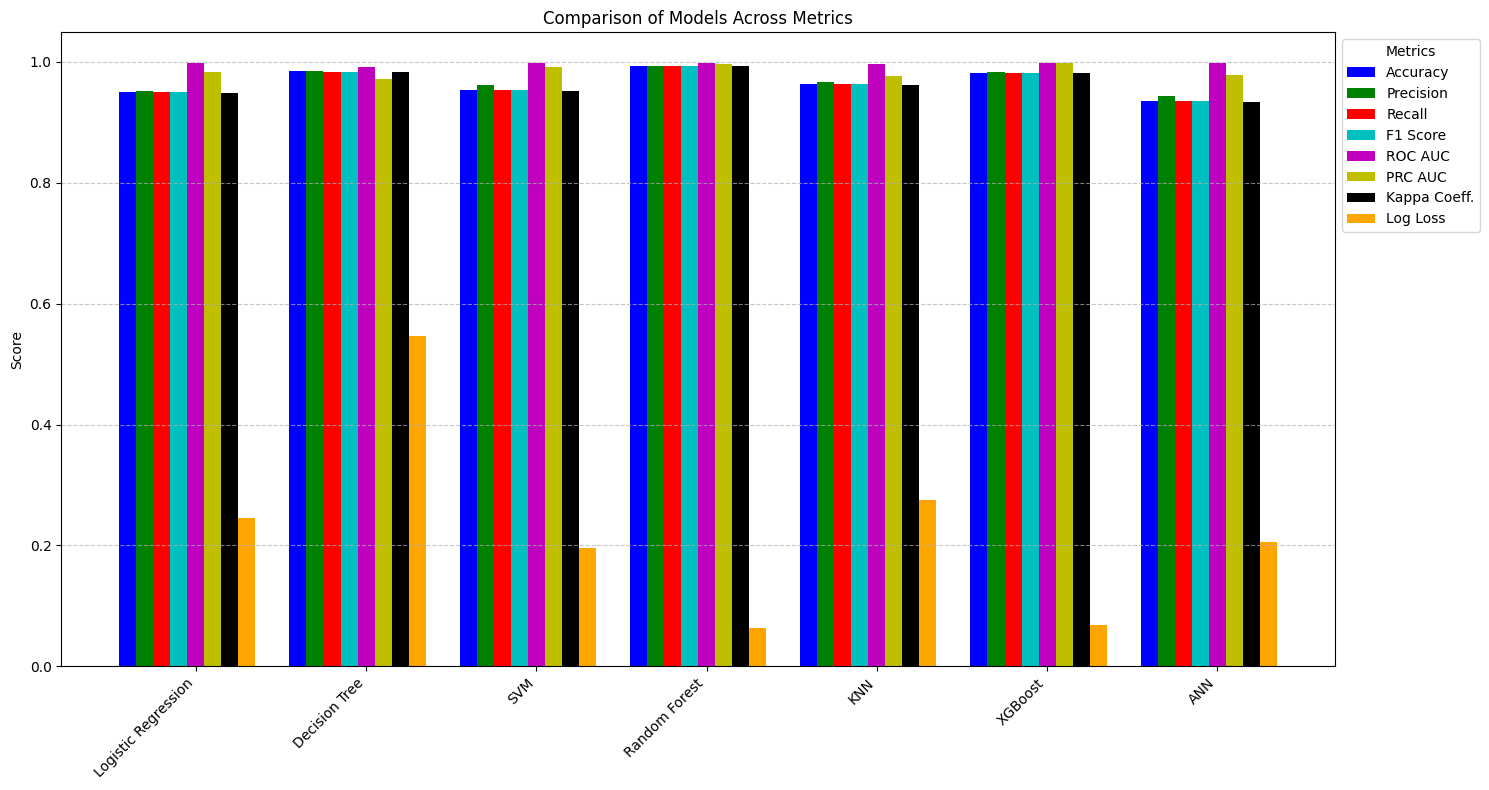

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Data
models = ["Logistic Regression", "Decision Tree", "SVM", "Random Forest", "KNN", "XGBoost", "ANN"]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC", "PRC AUC", "Kappa Coeff.", "Log Loss"]
data = [
    [0.951, 0.952, 0.951, 0.951, 0.999, 0.983, 0.949, 0.246],  # Logistic Regression
    [0.985, 0.985, 0.984, 0.984, 0.992, 0.971, 0.984, 0.546],  # Decision Tree
    [0.954, 0.961, 0.954, 0.954, 0.999, 0.991, 0.952, 0.195],  # SVM
    [0.993, 0.994, 0.994, 0.994, 0.999, 0.997, 0.993, 0.064],  # Random Forest
    [0.963, 0.967, 0.963, 0.963, 0.996, 0.976, 0.962, 0.276],  # KNN
    [0.982, 0.983, 0.982, 0.982, 0.999, 0.998, 0.981, 0.068],  # XGBoost
    [0.936, 0.944, 0.936, 0.935, 0.998, 0.978, 0.933, 0.206],  # ANN
]

# Transform data for grouped bar chart
data = np.array(data)
x = np.arange(len(models))  # Model indices
bar_width = 0.1  # Width of each bar
offsets = np.arange(-len(metrics)//2, len(metrics)//2) * bar_width

# Colors for metrics
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']

# Create grouped bar chart
plt.figure(figsize=(15, 8))
for i, metric in enumerate(metrics):
    plt.bar(x + offsets[i], data[:, i], bar_width, label=metric, color=colors[i % len(colors)])

# Customizations
plt.xticks(x, models, rotation=45, ha="right")
plt.ylabel("Score")
plt.title("Comparison of Models Across Metrics")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("Comparision Bar.png",dpi=1000)
# Show the plot
plt.show()


## LSTM

In [68]:
X_train = X_train.to_numpy()   # Or X_train.values as this was executed earlier in code
# X_val = X_val.to_numpy()

# Reshape to (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # Shape: (1540, 7, 1)
'''X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))          # Shape: (val_samples, 7, 1)'''
''' X_train = X_train.to_numpy()  # Or X_train.values '''
X_val = X_val.to_numpy()      # Convert X_val to NumPy array

# Reshape to (samples, timesteps, features)
''' X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))   '''# Shape: (1540, 7, 1)
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))          # Shape: (val_samples, 7, 1)


In [69]:
X_train.shape

(1540, 7, 1)

In [70]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Build the LSTM model
model = Sequential()

# Add an LSTM layer
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh', return_sequences=False))

# Add a Dense hidden layer
model.add(Dense(64, activation='relu'))

# Output layer for 22 classes
model.add(Dense(22, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 22)             │         1,430 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,486 (87.84 KB)

 Trainable params: 22,486 (87.84 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
print("X_train shape:", X_train.shape)  # Should be (1540, 7, 1)
print("y_train_encoded shape:", y_train_encoded.shape)  # Should be (1540, 22)


X_train shape: (1540, 7, 1)
y_train_encoded shape: (1540, 22)


In [72]:
from keras.backend import clear_session
clear_session()

In [73]:
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32)


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1226 - loss: 3.0446
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1385 - loss: 2.4899
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3617 - loss: 1.8849
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5546 - loss: 1.2957
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6184 - loss: 1.0265
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7030 - loss: 0.8419
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7708 - loss: 0.7232
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8456 - loss: 0.5834
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8411 - loss: 0.5048
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8674 - loss: 0.4397


# BlockChain

In [74]:
!pip install web3 eth-tester[py-evm]




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 827.7/827.7 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.5/587.5 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.6/798.6 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.8/314.8 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.5/170.5 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━

In [75]:
import eth_tester
print(eth_tester.__version__)


0.13.0b1


In [76]:
import joblib
# Load the model
LR_model = joblib.load("logistic_regression_model.pkl")
DT_model = joblib.load("DT_model.pkl")
SVM_model = joblib.load("SVM_model.pkl")
RF_model = joblib.load("random_forest_model.pkl")
KNN_model = joblib.load("KNN_model.pkl")
XG_model = joblib.load("XG_model.pkl")
ANN_model = joblib.load("ANN_model.pkl")

print("Models loaded successfully")

Models = [LR_model,DT_model,SVM_model,RF_model,KNN_model,XG_model,ANN_model]


Models loaded successfully


In [77]:
def Recommendation(model, data):
    # Ensure data is reshaped properly for prediction
    data = np.array(data).reshape(1, -1)  # Reshape if necessary

    # Get the second output of model prediction
    prediction = model.predict(data)
    max_index = np.argmax(prediction)

    # Decode the label
    prediction_label = Labels_Decoder[max_index]

    return str(prediction_label)

In [78]:
Recommendation(Models[6],[96,95,90,35,95,14,50])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


'banana'

In [79]:
from web3 import Web3
from web3 import EthereumTesterProvider

from eth_tester import EthereumTester
from eth_account import Account
import time

In [80]:
# Use an in-memory blockchain (Local test network)
eth_tester = EthereumTester()
web3 = Web3(EthereumTesterProvider(eth_tester))
# Generate a test account
# account = web3.eth.account.create()
account =  web3.eth.accounts[0]

print("✅ Local Test Ethereum Account Created!")
print("Address:",account)
# print("Private Key (Keep Secret!):", account.key.hex())

# Check balance (should be 0 in local test env)
balance = web3.eth.get_balance(account)
print("Balance in ETH:", web3.from_wei(balance, 'ether'))

✅ Local Test Ethereum Account Created!
Address: 0x7E5F4552091A69125d5DfCb7b8C2659029395Bdf
Balance in ETH: 1000000


<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()


In [81]:
''' #ABI and bytecode generated from Soldity
with open("/kaggle/input/solidity/abi.txt", "r") as file:
    ABI = file.read()

with open("/kaggle/input/solidity/Bytecode.txt", "r") as file:
    bytecode = file.read() '''

' #ABI and bytecode generated from Soldity\nwith open("/kaggle/input/solidity/abi.txt", "r") as file:\n    ABI = file.read()\n\nwith open("/kaggle/input/solidity/Bytecode.txt", "r") as file:\n    bytecode = file.read() '

In [82]:
contract.constructor().estimate_gas()

NameError: name 'contract' is not defined

In [ ]:
# Build the transaction
contract = web3.eth.contract(abi=ABI, bytecode=bytecode)
initial = time.time()
transaction = contract.constructor().build_transaction({
    'gas': contract.constructor().estimate_gas(),
    'from': account,
    'nonce':  web3.eth.get_transaction_count(account),
    'gasPrice': web3.to_wei('10', 'gwei')
})

# Send the transaction
tx_hash = web3.eth.send_transaction(transaction)
Final = time.time()
Transaction_time = Final - initial

# Wait for the transaction to be mined
receipt = web3.eth.wait_for_transaction_receipt(tx_hash)
receipt = dict(receipt)
receipt['TransactionTime'] = Transaction_time

TransactionHistory = pd.DataFrame([receipt])
TransactionHistory

In [ ]:
# Interact with the deployed contract
contract_instance = web3.eth.contract(address=receipt['contractAddress'], abi=ABI)

In [ ]:
''' # Function to add crop data
def add_crop_data(N, P, K, temperature, humidity, pH, rainfall,recomendation):
    initial = time.time()
    transaction = contract_instance.functions.storeValue(N, P, K, temperature, humidity, pH, rainfall,recomendation).build_transaction({
        'gas': 2000000,
        'gasPrice': web3.to_wei('20', 'gwei'),
        'nonce': web3.eth.get_transaction_count(account),
    })

    tx_hash = web3.eth.send_transaction(transaction)
    Final = time.time()
    # Wait for transaction receipt (confirmation)
    txn_receipt = web3.eth.wait_for_transaction_receipt(tx_hash)
    Transaction_time = Final - initial
    reciept = dict(txn_receipt)
    reciept['TransactionTime'] = Transaction_time
    return reciept '''



def Recommendation(model, data):
    # Ensure data is reshaped properly for prediction
    data = np.array(data).reshape(1, -1)  # Reshape if necessary

    # Get the second output of model prediction
    prediction = model.predict(data)
    max_index = np.argmax(prediction)

    # Decode the label
    prediction_label = Labels_Decoder[max_index]

    return str(prediction_label)


def DeciToInt(x,n=10**10):
    return int(x*n)

def IntToDeci(x,n=10**10):
    return x/n

In [ ]:
Recommendation(Models[6],X_test.iloc[0])

In [ ]:
# TransactionHistory = dict
for (_, row), y in zip(X_test.iterrows(), y_test):
    # print(row)
    reciept = add_crop_data(
        DeciToInt(row['N']),
        DeciToInt(row['P']),
        DeciToInt(row['K']),
        DeciToInt(row['temperature']),
        DeciToInt(row['humidity']),
        DeciToInt(row['ph']),
        DeciToInt(row['rainfall']),
        Recommendation(Models[6],row)  # Use `row` instead of `X_val`
    )
    # break

# reciept['y_value'] = y  # Store y_test value in the receipt
    reciept["ActualCrop"] = Labels_Decoder[y]
    History = pd.DataFrame([reciept])
    TransactionHistory = pd.concat([TransactionHistory, History], ignore_index=True)
    # break
# # History

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:

TransactionHistory
TransactionHistory = TransactionHistory.iloc[1:].reset_index(drop=True)
TransactionHistory

In [ ]:
# Save to a CSV file
# TransactionHistory.to_csv('TransactionHistory.csv', index=False)

In [ ]:
import datetime
def show_last_data():
    last_data = contract_instance.functions.showLastValue().call()
    return last_data
def Owner():
    address = contract_instance.functions.owner().call()
    return address


def show_all_data():
    all_data = contract_instance.functions.showAllValues().call()

    # Convert data to Pandas DataFrame
    df = pd.DataFrame(all_data, columns=[
        "Nitrogen", "Phosphorus", "Potassium", "Temperature",
        "Humidity", "pH", "Rainfall", "Recommendation", "Timestamp"
    ])

    # Apply IntToDeci() function to numerical columns
    columns_to_convert = ["Nitrogen", "Phosphorus", "Potassium", "Temperature", "Humidity", "pH", "Rainfall"]
    df[columns_to_convert] = df[columns_to_convert].apply(lambda col: col.map(IntToDeci))

    # Convert Timestamp to human-readable format
    df["Timestamp"] = df["Timestamp"].apply(lambda x: datetime.datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))

    return df



In [ ]:
show_all_data()

In [ ]:
Recomendations = show_all_data()

History = pd.concat([TransactionHistory,Recomendations],axis=1)
History = History.loc[:, ~History.columns.duplicated()]

# Convert Timestamp to datetime format (handle errors & NaNs)
History["Timestamp"] = pd.to_datetime(History["Timestamp"], errors='coerce')

# Fill NaN timestamps with a default time (or remove NaN rows)
# TransactionHistory["Timestamp"] = TransactionHistory["Timestamp"].fillna(pd.Timestamp("1970-01-01 00:00:00"))

# Sort by Timestamp in ascending order
History = History.sort_values(by="Timestamp", ascending=True, na_position='last')




History

In [ ]:
# Save to a CSV file
History.to_csv('ANN_model_TransactionHistory.csv', index=False)
History

In [ ]:
History.columns

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Load Ethereum transaction dataset
file_path = "/kaggle/working/TransactionHistory.csv"  # Update this if needed
df = pd.read_csv(file_path)
# Convert Timestamp to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# Ensure numerical columns are in the correct format
df['effectiveGasPrice'] = pd.to_numeric(df['effectiveGasPrice'], errors='coerce')
df['gasUsed'] = pd.to_numeric(df['gasUsed'], errors='coerce')

# Extract date for daily analysis
df['Date'] = df['Timestamp'].dt.date

In [ ]:
lr = pd.read_csv("/kaggle/working/LR_model_TransactionHistory.csv")
dt = pd.read_csv("/kaggle/working/DT_model_TransactionHistory.csv")
svm = pd.read_csv("/kaggle/working/SVM_model_TransactionHistory.csv")
rf = pd.read_csv("/kaggle/working/RF_model_TransactionHistory.csv")
knn = pd.read_csv("/kaggle/working/KNN_model_TransactionHistory.csv")
xg = pd.read_csv("/kaggle/working/XG_model_TransactionHistory.csv")
ann = pd.read_csv("/kaggle/working/ANN_model_TransactionHistory.csv")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

plt.figure(figsize=(8, 5))
transaction_times = lr["TransactionTime"]
# Compute mean and standard deviation
mu1, sigma = np.mean(transaction_times), np.std(transaction_times)
mu = mu1
# Generate normal distribution curve
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)
# Plot the normal distribution

plt.plot(x, y, label=f'Logistic Regression\n(μ={mu:.5f}, σ={sigma:.5f})', color='blue')
plt.axvline(mu, linestyle='dashed', label='Mean (μ)',color='blue')

transaction_times = dt["TransactionTime"]
# Compute mean and standard deviation
mu2, sigma = np.mean(transaction_times), np.std(transaction_times)
mu = mu2
# Generate normal distribution curve
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)
# Plot the normal distribution
plt.plot(x, y, label=f'Decision tree\n(μ={mu:.5f}, σ={sigma:.5f})', color='orange')
plt.axvline(mu, linestyle='dashed', label='Mean (μ)',color='orange')

transaction_times = svm["TransactionTime"]
# Compute mean and standard deviation
mu3, sigma = np.mean(transaction_times), np.std(transaction_times)
mu = mu3
# Generate normal distribution curve
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)
# Plot the normal distribution
plt.plot(x, y, label=f'SVM\n(μ={mu:.5f}, σ={sigma:.5f})', color='violet')
plt.axvline(mu, linestyle='dashed', label='Mean (μ)',color='violet')

transaction_times = rf["TransactionTime"]
# Compute mean and standard deviation
mu4, sigma = np.mean(transaction_times), np.std(transaction_times)
mu = mu4
# Generate normal distribution curve
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)
# Plot the normal distribution
plt.plot(x, y, label=f'Random Forest\n(μ={mu:.5f}, σ={sigma:.5f})', color='red')
plt.axvline(mu, linestyle='dashed', label='Mean (μ)',color='red')

transaction_times = knn["TransactionTime"]
# Compute mean and standard deviation
mu5, sigma = np.mean(transaction_times), np.std(transaction_times)
mu = mu5
# Generate normal distribution curve
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)
# Plot the normal distribution
plt.plot(x, y, label=f'KNN\n(μ={mu:.5f}, σ={sigma:.5f})', color='brown')
plt.axvline(mu, linestyle='dashed', label='Mean (μ)',color='brown')

transaction_times = xg["TransactionTime"]
# Compute mean and standard deviation
mu6, sigma = np.mean(transaction_times), np.std(transaction_times)
mu = mu6
# Generate normal distribution curve
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)
# Plot the normal distribution
plt.plot(x, y, label=f'Random Forest\n(μ={mu:.5f}, σ={sigma:.5f})', color='green')
plt.axvline(mu, linestyle='dashed', label='Mean (μ)',color='green')

transaction_times = ann["TransactionTime"]
# Compute mean and standard deviation
mu7, sigma = np.mean(transaction_times), np.std(transaction_times)
mu = mu7
# Generate normal distribution curve
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)
# Plot the normal distribution
plt.plot(x, y, label=f'ANN\n(μ={mu:.5f}, σ={sigma:.5f})', color='maroon')
plt.axvline(mu, linestyle='dashed', label='Mean (μ)',color='maroon')


# List of means (replace with actual values from your models)
means = [mu1,mu2,mu3,mu4,mu5,mu6,mu7]

# Calculate overall mean
overall_mean = np.mean(means)



plt.axvline(mu, linestyle='dashed', label=f'Overall Mean (μ={overall_mean:.5f})',color='black')

# Labels and title
plt.xlabel('Transaction Time')
plt.ylabel('Probability Density')
# plt.title('Normal Distribution of Transaction Time')
plt.legend(ncol=2, loc='upper center', bbox_to_anchor=(0.4, -0.15))
plt.grid()

# Show plot
plt.savefig("Normal Distribution of Transaction Time.png", bbox_inches='tight', dpi=600)
plt.show()


In [ ]:
# Compute mean gas used for each model
mean_gas_used = [
    lr["gasUsed"].mean(),
    dt["gasUsed"].mean(),
    svm["gasUsed"].mean(),
    rf["gasUsed"].mean(),
    knn["gasUsed"].mean(),
    xg["gasUsed"].mean(),
    ann["gasUsed"].mean()
]

# Calculate the overall mean of all model means
overall_mean_gas = sum(mean_gas_used) / len(mean_gas_used)
print(f"Overall Mean Gas Used: {overall_mean_gas}")


In [ ]:
# Combine all dataframes into one
all_data = pd.concat([lr, dt, svm, rf, knn, xg, ann], ignore_index=True)

# Calculate overall Transaction Success Rate (%)
successful_transactions = ((all_data['status'] == 1) & (all_data['ActualCrop'] == all_data['Recommendation'])).sum()
total_transactions = len(all_data)

overall_success_rate = (successful_transactions / total_transactions) * 100 if total_transactions > 0 else 0

print(f"Overall Transaction Success Rate: {overall_success_rate:.5f}%")